In [1]:
import pandas as pd 
import numpy as np 
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop(columns="Unnamed: 0",inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Features-----------> TV,Radio,Newspaper
Label/Target------>sales

In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [9]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

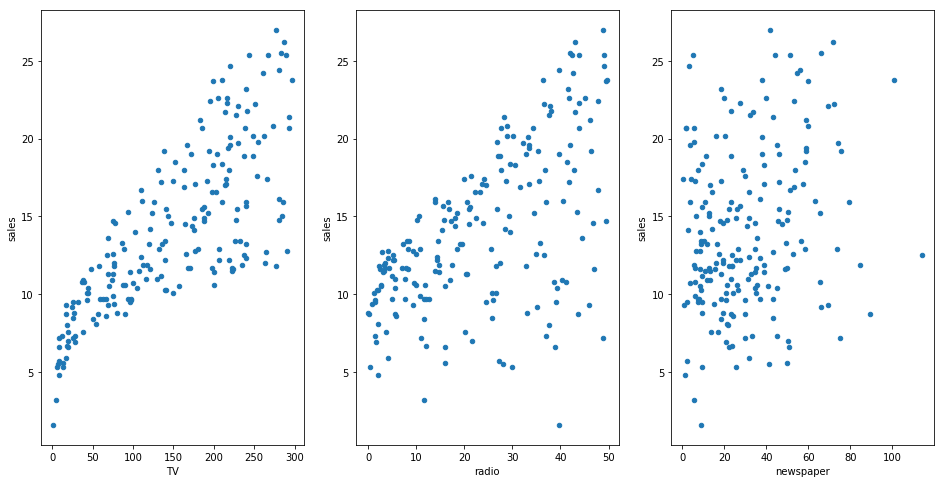

In [10]:
fig,axs=plt.subplots(1,3)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot.scatter(x='newspaper',y='sales',ax=axs[2])
plt.show()
fig.savefig('inest.jpg')

# SIMPLE LINEAR REGRESSION

In [11]:
from sklearn.linear_model import LinearRegression
x=df[['TV']]
y=df['sales']
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lm.intercept_

7.032593549127693

In [13]:
lm.coef_[0]

0.047536640433019764

In [14]:
x_new=pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new

,TV
0,0.7
1,296.4


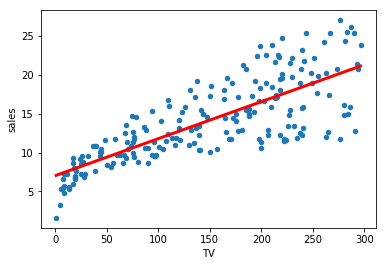

In [15]:
pred=lm.predict(x_new)
pred

df.plot.scatter(x='TV',y='sales')
plt.plot(x_new,pred,linewidth=3,c='r')

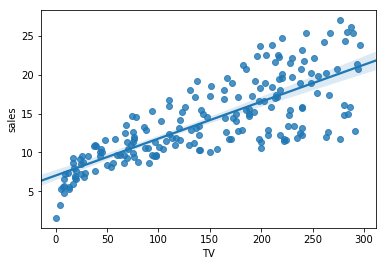

In [16]:
import seaborn as sns
sns.regplot(data=df,x='TV',y='sales')

# Model Confidence

## Hypothesis testing & p_value

Ho: No relationship exists between TV & sales 

H1: reltionship exists between tv & sales

In [17]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV',data=df).fit()

In [18]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [19]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [20]:
lm.rsquared

0.611875050850071

# Multiple Linear Regression

In [21]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
lm=LinearRegression()
x=df[['TV','radio','newspaper']]
y=df.sales
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
print("Intercept:-----",lm.intercept_,"\n Coefficient:\n\tTV:------->",lm.coef_[0],"\n\tRadio:----->",lm.coef_[1],"\n\tNewspaper:----->",lm.coef_[2])

Intercept:----- 2.9388893694594067 
 Coefficient:
	TV:-------> 0.04576464545539761 
	Radio:-----> 0.18853001691820462 
	Newspaper:-----> -0.0010374930424762972


In [24]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           1.58e-96
Time:                        14:38:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model confidence

In [25]:
lm=smf.ols(formula='sales~TV+radio',data=df).fit()
lm.rsquared

0.8971942610828957

In [26]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm.rsquared

0.8972106381789522

# Project 1: admission chances

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df['GRE Score']=df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score']=df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating']=df['University Rating'].fillna(df['University Rating'].mode()[0])

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df.drop(columns=['Serial No.'],inplace=True)

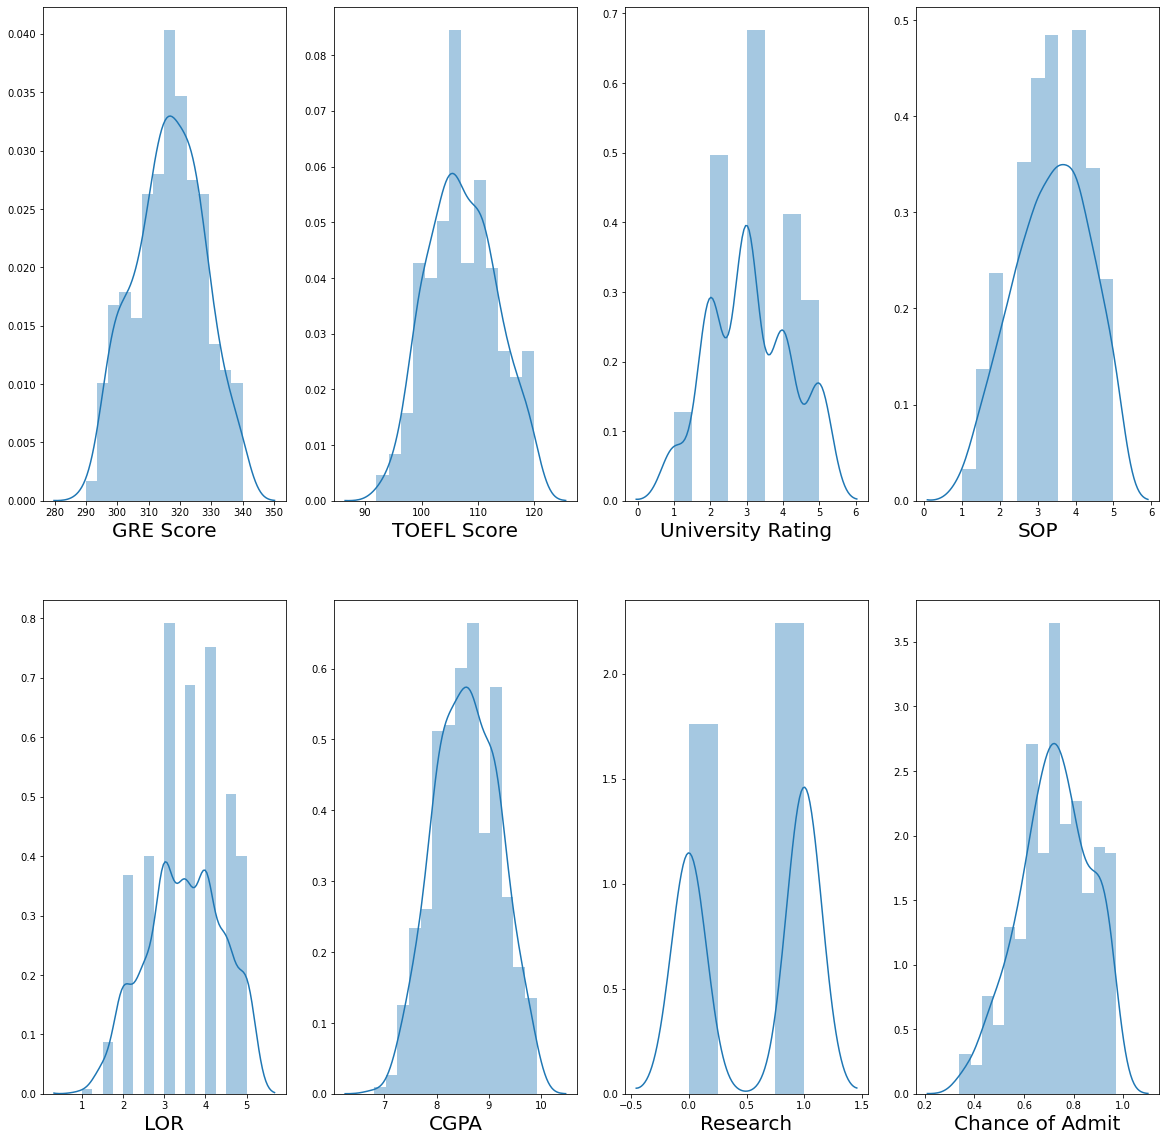

In [11]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in df:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

In [12]:
y=df['Chance of Admit']
x=df.drop(columns='Chance of Admit')

E:\files\lib\site-packages\seaborn\relational.py:913: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  scout = ax.scatter([], [], **kws)


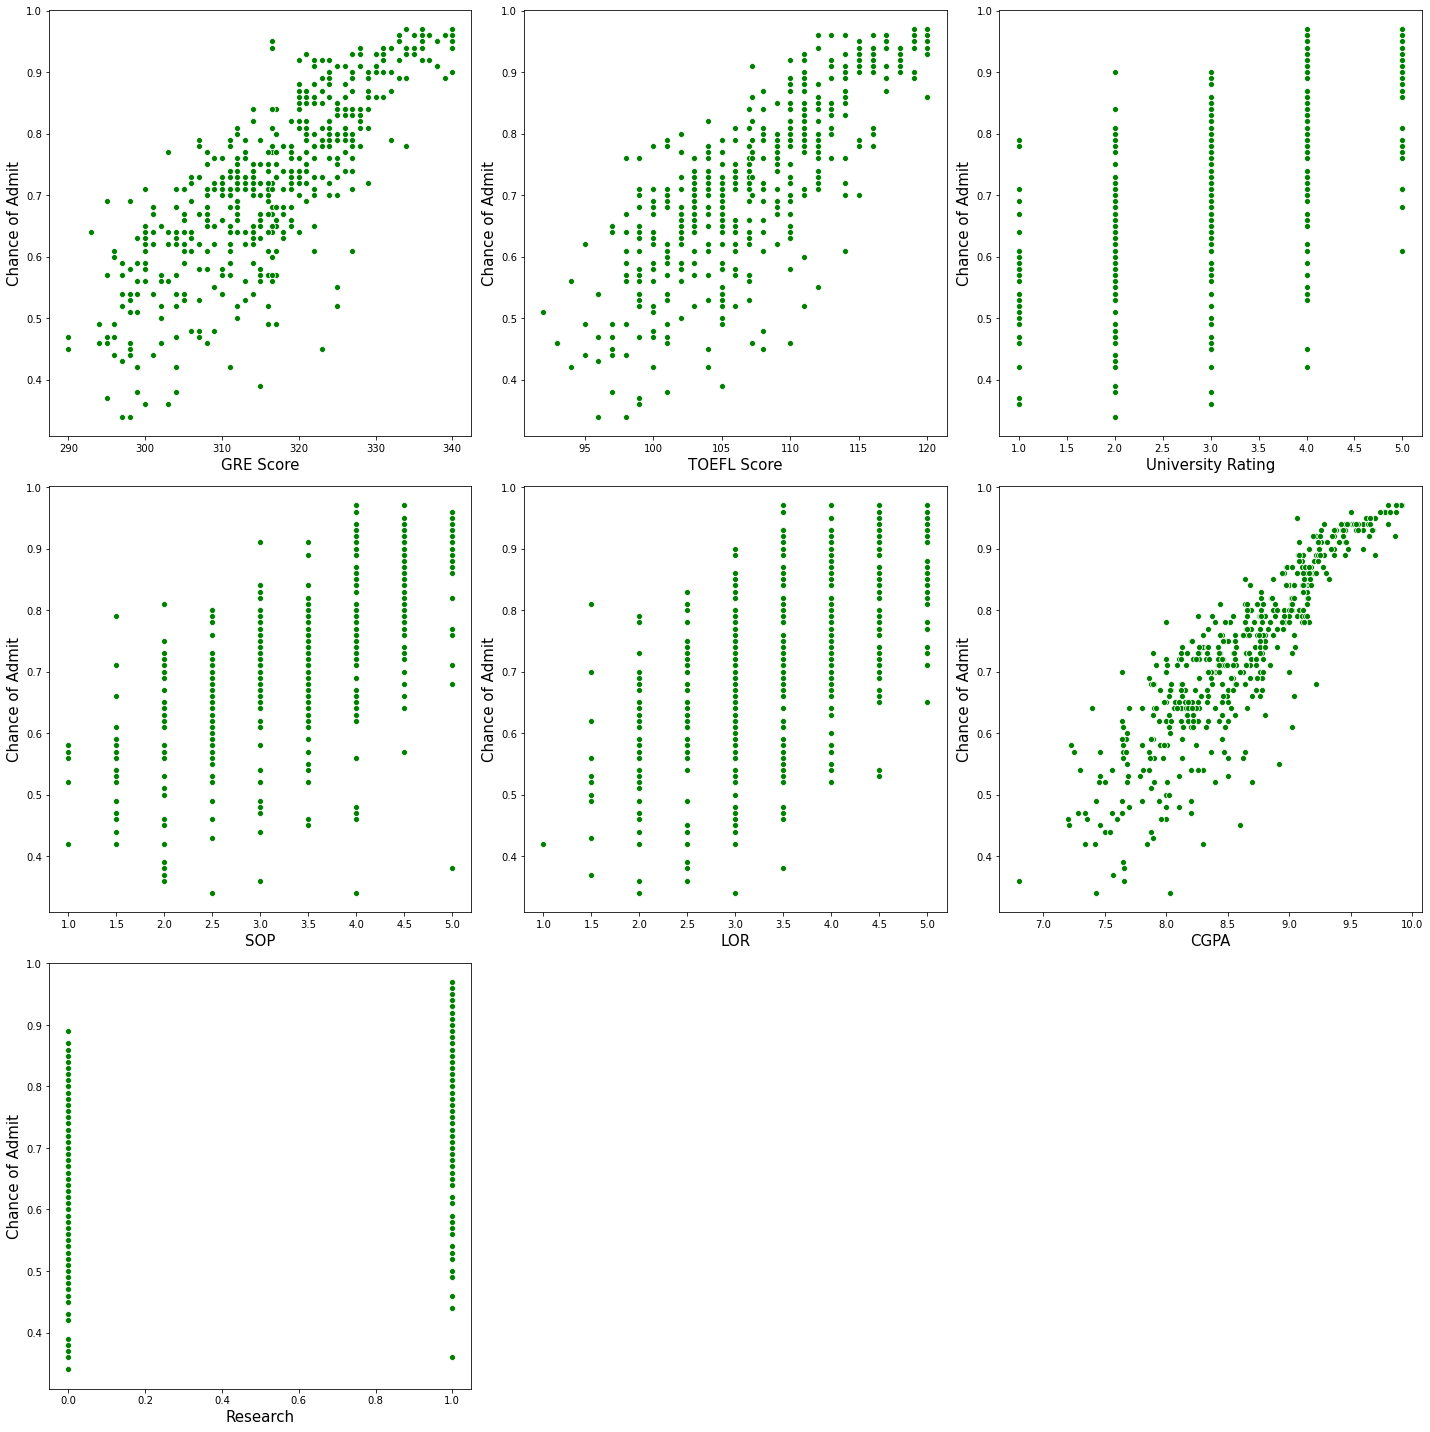

In [13]:
plotno=1
plt.figure(figsize=(20,20))
for col in x:
    if plotno<8:
        plt.subplot(3,3,plotno)
        sns.scatterplot(x[col],y,color='G')
        plt.xlabel(col,fontsize=15)
        plt.ylabel("Chance of Admit",fontsize=15)
    plotno+=1
plt.tight_layout()

In [14]:
#Scaling or normalizing the data
scaler=StandardScaler()
Xscaled_=scaler.fit_transform(x)

In [15]:
Xscaled_

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(Xscaled_,y,test_size=0.25,random_state=3265)

In [17]:
xtrain

array([[ 0.85111073,  1.12686938, -0.10462259, ..., -0.52351283,
         0.88307384,  0.88640526],
       [-0.23066792,  0.1343601 ,  0.78200955, ...,  0.55812525,
         0.76721964,  0.88640526],
       [ 0.67081429, -0.03105811,  0.78200955, ...,  1.09894429,
         0.48585943,  0.88640526],
       ...,
       [ 0.94125895,  1.29228759,  0.78200955, ...,  0.55812525,
         0.93272564, -1.12815215],
       [-0.41096436, -0.69273097,  0.78200955, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.40036962,  1.12686938,  0.78200955, ...,  1.63976333,
         0.89962444, -1.12815215]])

In [18]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [19]:
df.tail(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [20]:
reg.predict(scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]]))

array([0.70647865])

In [21]:
reg.predict(StandardScaler().fit_transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

array([0.7229096])

In [22]:
reg.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

array([0.82858016])

In [24]:
XX=[327.0,113.0,4.0,4.5,4.5,9.04,0]

In [35]:
reg.predict(scaler.fit([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Fit() and Transform()

What is the difference between fit(), transform(), fit_tranform()?

arr = [“This is the first example”, “This is second example”, “And third example”] vec = CountVectorizer() # bag of words- will count the occurrence of respective words vec.fit(arr) vec.tranform(arr) vec.fit_transform(arr)

fit():- It will assign the value of the function (in this case CountVectorizer()) with data of arr and store it in vector.

transform():- After the value is calculated and stored in vector, now vector.transform(arr) will return the value of the vector.

fit_tranform():- This will skip one line of code and will assign value to the vector as well as will return the value of the vector.

Then why different functions are used?

To avoid data leaking issues.

The ML model is fitted with training data and then transformed with training and testing data. Thus, fit() is used mostly for training data, or fit_transform() can be used for training data while transform() is used for testing data.

In [28]:
df1=df.copy()

In [29]:
df1.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92


In [30]:
Fit=scaler.fit(df1)

In [34]:
x_scales=Fit.transform(df1)

In [23]:
reg.predict(StandardScaler().transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [48]:
#Saving Model
filename="regression_model.pickle"
pickle.dump(reg,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

In [49]:
a

array([0.82858016])

In [51]:
#Adjusted r square
reg.score(xtrain,ytrain)

0.8332489105348617

In [52]:
reg.score(xtest,ytest)

0.783227821115422

In [53]:
ypred=reg.predict(xtest)

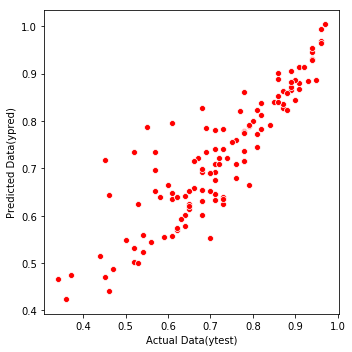

In [55]:
plt.figure(figsize=(5,5))
sns.scatterplot(ytest,ypred,color='r')
plt.xlabel("Actual Data(ytest)")
plt.ylabel('Predicted Data(ypred)')
plt.tight_layout()

## Model Evaluation

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(ypred,ytest)
MSE=mean_squared_error(ypred,ytest)
RMSE=np.sqrt(MSE)
print("Mean Absolute Error:---------->",MAE,"\nMean Squared Error:-------->",MSE,"\nRoot Mean Squared Error:-------->",RMSE)

Mean Absolute Error:----------> 0.046766399489193984 
Mean Squared Error:--------> 0.0046195018409019096 
Root Mean Squared Error:--------> 0.06796691725318951
